In [8]:
import pandas as pd

#cloning raw data to work on it
raw = pd.read_csv("dsa_210_data_raw.csv")   
df = raw.copy()


In [7]:
#check data structure
df.head()
df.shape
df.columns
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   training_date   23 non-null     object 
 1   training_type   23 non-null     object 
 2   attendance      23 non-null     float64
 3   throwing_hours  23 non-null     float64
 4   match_date      17 non-null     object 
 5   opponent_level  17 non-null     object 
 6   minutes_played  17 non-null     float64
 7   errors_total    17 non-null     float64
 8   errors_drop     17 non-null     float64
 9   errors_throw    17 non-null     float64
 10  errors_miscom   17 non-null     float64
dtypes: float64(7), object(4)
memory usage: 2.3+ KB


In [9]:
df = df.drop(columns=["Unnamed: 4", "Unnamed: 5", "Unnamed: 6"])
df.columns = df.columns.str.lower().str.strip()

In [10]:
#recheck data structure
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   training_date   23 non-null     object 
 1   training_type   23 non-null     object 
 2   attendance      23 non-null     float64
 3   throwing_hours  23 non-null     float64
 4   match_date      17 non-null     object 
 5   opponent_level  17 non-null     object 
 6   minutes_played  17 non-null     float64
 7   errors_total    17 non-null     float64
 8   errors_drop     17 non-null     float64
 9   errors_throw    17 non-null     float64
 10  errors_miscom   17 non-null     float64
dtypes: float64(7), object(4)
memory usage: 2.3+ KB


In [13]:
#convert date strings to datetime object
df["training_date"] = pd.to_datetime(df["training_date"])
df["match_date"] = pd.to_datetime(df["match_date"])


In [15]:
#seperate match dates
matches = df[df["match_date"].notna()].copy()


In [18]:
#function to help work with data before the match dates
def all_trainings_before_match(match_date):
    return df[df["training_date"] < match_date]


In [19]:
matches["avg_throwing_hours_before"] = matches["match_date"].apply(
    lambda x: all_trainings_before_match(x)["throwing_hours"].mean()
)


In [27]:
def all_trainings_before_match(match_date):
    return df[df["training_date"] < match_date]

matches["avg_attendance_before"] = matches["match_date"].apply(
    lambda x: all_trainings_before_match(x)["attendance"].mean()
)


In [31]:
matches["total_trainings_before"] = matches["match_date"].apply(
    lambda x: df[df["training_date"] < x].shape[0]
)


In [20]:
matches.describe()


,training_date,attendance,throwing_hours,match_date,minutes_played,errors_total,errors_drop,errors_throw,errors_miscom,avg_throwing_hours_before
count,17,17.0,17.000000,17,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000
mean,2025-10-16 15:31:45.882352896,1.0,2.117647,2025-11-09 18:21:10.588235264,20.176471,2.117647,0.235294,1.470588,0.411765,1.941496
min,2025-09-26 00:00:00,1.0,1.000000,2025-10-25 00:00:00,7.000000,0.000000,0.000000,0.000000,0.000000,1.826087
25%,2025-10-06 00:00:00,1.0,1.000000,2025-10-26 00:00:00,15.000000,1.000000,0.000000,1.000000,0.000000,1.826087
50%,2025-10-15 00:00:00,1.0,2.000000,2025-11-08 00:00:00,19.000000,2.000000,0.000000,1.000000,0.000000,1.916667
75%,2025-10-29 00:00:00,1.0,3.000000,2025-11-29 00:00:00,25.000000,3.000000,0.000000,2.000000,1.000000,2.062500
max,2025-11-12 00:00:00,1.0,5.000000,2025-11-30 00:00:00,35.000000,5.000000,1.000000,3.000000,1.000000,2.062500
std,NaN,0.0,1.053705,NaN,7.169687,1.615640,0.437237,1.007326,0.507300,0.099419


In [21]:
#most frequent error type
error_cols = ["errors_drop", "errors_throw", "errors_miscom"]
matches[error_cols].sum().sort_values(ascending=False)


errors_throw     25.0
errors_miscom     7.0
errors_drop       4.0
dtype: float64

In [22]:
matches[["avg_throwing_hours_before", "errors_throw"]].corr()


,avg_throwing_hours_before,errors_throw
avg_throwing_hours_before,1.000000,-0.099092
errors_throw,-0.099092,1.000000


In [23]:
matches[["minutes_played", "errors_total"]].corr()


,minutes_played,errors_total
minutes_played,1.000000,0.613188
errors_total,0.613188,1.000000


In [28]:
matches[["avg_attendance_before", "errors_total"]].corr()


,avg_attendance_before,errors_total
avg_attendance_before,NaN,NaN
errors_total,NaN,1.0


In [32]:
matches[["avg_throwing_hours_before", "errors_throw"]].corr()
matches[["minutes_played", "errors_total"]].corr()
matches[["total_trainings_before", "errors_total"]].corr()


,total_trainings_before,errors_total
total_trainings_before,1.000000,0.395522
errors_total,0.395522,1.000000


In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [34]:
def trainings_before(match_date):
    return df[df["training_date"] < match_date]


In [35]:
matches["weekly_throwing_hours_before"] = matches["match_date"].apply(
    lambda x: (
        trainings_before(x)["throwing_hours"].sum() /
        max(1, (trainings_before(x)["training_date"].nunique() / 7))
    )
)


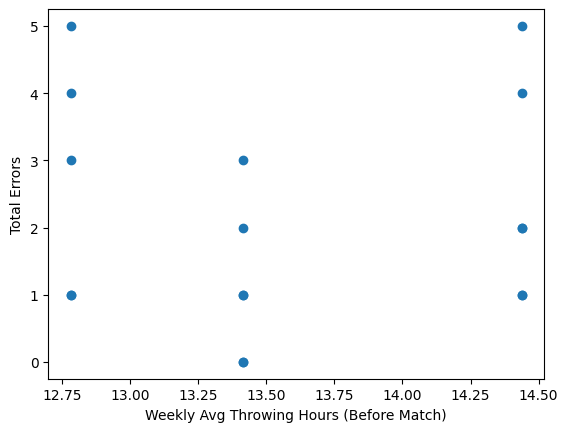

,weekly_throwing_hours_before,errors_total
weekly_throwing_hours_before,1.000000,0.009931
errors_total,0.009931,1.000000


In [36]:
plt.figure()
plt.scatter(
    matches["weekly_throwing_hours_before"],
    matches["errors_total"]
)
plt.xlabel("Weekly Avg Throwing Hours (Before Match)")
plt.ylabel("Total Errors")
plt.show()

matches[["weekly_throwing_hours_before", "errors_total"]].dropna().corr()


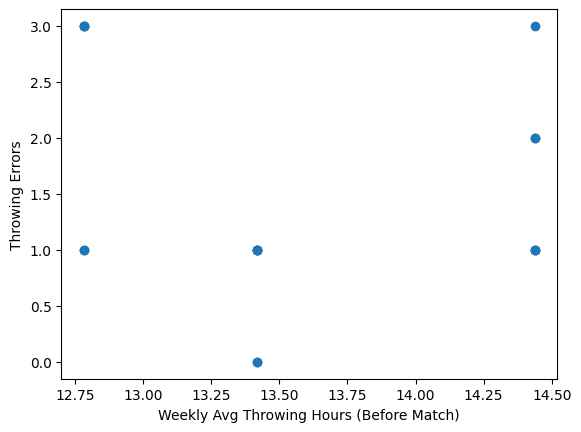

,weekly_throwing_hours_before,errors_throw
weekly_throwing_hours_before,1.000000,-0.099092
errors_throw,-0.099092,1.000000


In [37]:
plt.figure()
plt.scatter(
    matches["weekly_throwing_hours_before"],
    matches["errors_throw"]
)
plt.xlabel("Weekly Avg Throwing Hours (Before Match)")
plt.ylabel("Throwing Errors")
plt.show()

matches[["weekly_throwing_hours_before", "errors_throw"]].dropna().corr()


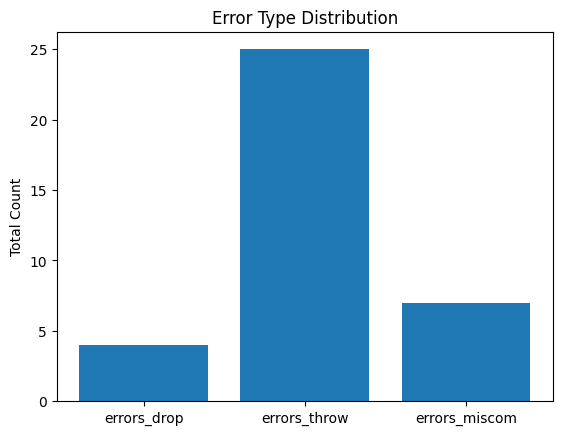

In [38]:
error_cols = ["errors_drop", "errors_throw", "errors_miscom"]
error_totals = matches[error_cols].sum()

plt.figure()
plt.bar(error_totals.index, error_totals.values)
plt.ylabel("Total Count")
plt.title("Error Type Distribution")
plt.show()


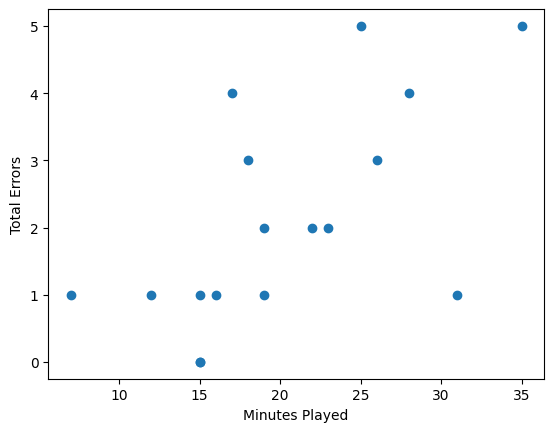

,minutes_played,errors_total
minutes_played,1.000000,0.613188
errors_total,0.613188,1.000000


In [39]:
plt.figure()
plt.scatter(
    matches["minutes_played"],
    matches["errors_total"]
)
plt.xlabel("Minutes Played")
plt.ylabel("Total Errors")
plt.show()

matches[["minutes_played", "errors_total"]].dropna().corr()


In [40]:
matches["error_rate"] = matches["errors_total"] / matches["minutes_played"]


In [41]:
opp_error = matches.groupby("opponent_level")["error_rate"].mean()


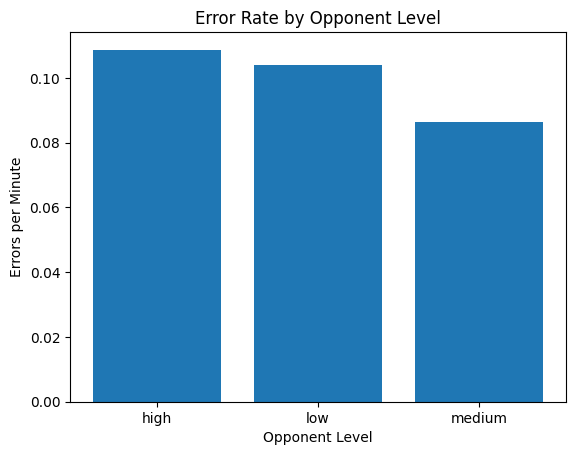

In [42]:
plt.figure()
plt.bar(opp_error.index, opp_error.values)
plt.ylabel("Errors per Minute")
plt.xlabel("Opponent Level")
plt.title("Error Rate by Opponent Level")
plt.show()


In [43]:
analysis_df = matches[
    [
        "weekly_throwing_hours_before",
        "minutes_played",
        "error_rate",
        "errors_throw",
        "errors_total"
    ]
].dropna()

analysis_df.corr()


,weekly_throwing_hours_before,minutes_played,error_rate,errors_throw,errors_total
weekly_throwing_hours_before,1.000000,0.544260,-0.284239,-0.099092,0.009931
minutes_played,0.544260,1.000000,0.155583,0.420476,0.613188
error_rate,-0.284239,0.155583,1.000000,0.864688,0.842486
errors_throw,-0.099092,0.420476,0.864688,1.000000,0.885528
errors_total,0.009931,0.613188,0.842486,0.885528,1.000000


In [48]:
#creating model to understand which aspect has the major effect on error
model_df = matches[
    [
        "errors_total",
        "weekly_throwing_hours_before",
        "minutes_played"
    ]
].dropna()


In [45]:
X = model_df[
    ["weekly_throwing_hours_before", "minutes_played"]
]

y = model_df["errors_total"]


In [46]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [49]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_scaled, y)


,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [50]:
coef_df = pd.DataFrame({
    "Feature": X.columns,
    "Standardized_Coefficient": model.coef_
}).sort_values(by="Standardized_Coefficient", key=abs, ascending=False)

coef_df


,Feature,Standardized_Coefficient
1,minutes_played,1.353601
0,weekly_throwing_hours_before,-0.721145


In [52]:
#model's power to explain
model.score(X_scaled, y)


0.5249769556458348

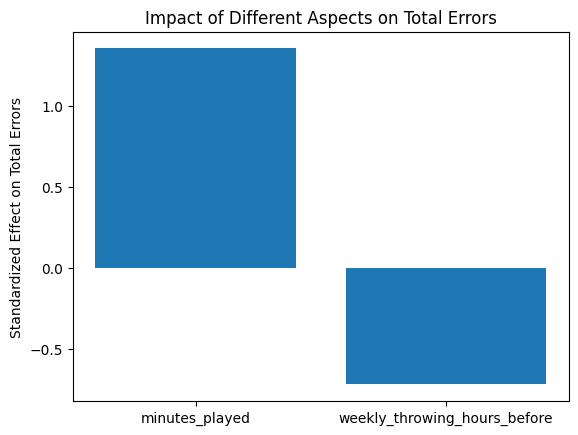

In [53]:
plt.figure()
plt.bar(
    coef_df["Feature"],
    coef_df["Standardized_Coefficient"]
)
plt.ylabel("Standardized Effect on Total Errors")
plt.title("Impact of Different Aspects on Total Errors")
plt.show()


In [54]:
coef_df


,Feature,Standardized_Coefficient
1,minutes_played,1.353601
0,weekly_throwing_hours_before,-0.721145


In [70]:
model_df = matches[
    [
        "errors_total",
        "weekly_throwing_hours_before",
        "minutes_played",
        "opponent_level"
    ]
].dropna()



In [71]:
opponent_dummies = pd.get_dummies(
    matches["opponent_level"],
    prefix="opponent_level"
)


In [72]:
opponent_dummies.columns


Index(['opponent_level_high', 'opponent_level_low', 'opponent_level_medium'], dtype='object')

In [73]:
opponent_dummies = opponent_dummies.drop(
    columns=["opponent_level_medium"]
)


In [74]:
model_df = pd.concat(
    [
        matches[
            [
                "errors_total",
                "weekly_throwing_hours_before",
                "minutes_played"
            ]
        ],
        opponent_dummies
    ],
    axis=1
).dropna()


In [75]:
X = model_df.drop(columns=["errors_total"])
y = model_df["errors_total"]


In [76]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

model = LinearRegression()
model.fit(X_scaled, y)


,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [77]:
coef_df = pd.DataFrame({
    "Feature": X.columns,
    "Standardized_Coefficient": model.coef_
}).sort_values(
    by="Standardized_Coefficient",
    key=abs,
    ascending=False
)

coef_df


,Feature,Standardized_Coefficient
1,minutes_played,1.307578
0,weekly_throwing_hours_before,-0.669988
2,opponent_level_high,0.202351
3,opponent_level_low,0.084819


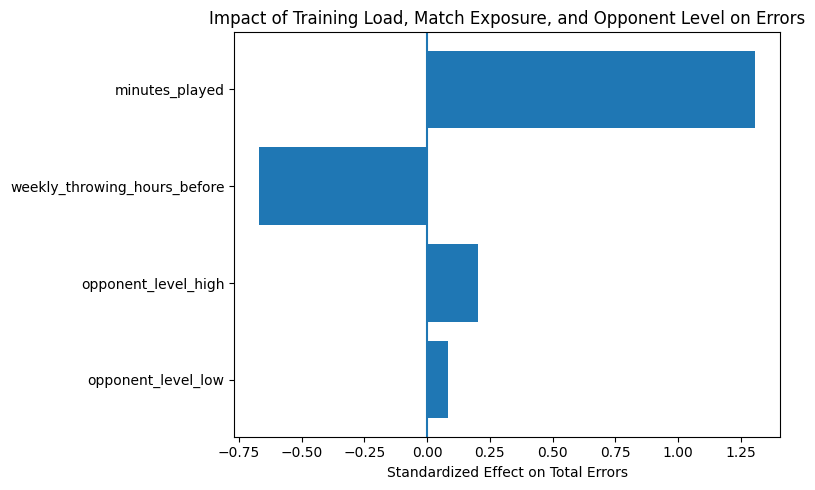

In [78]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))

plt.barh(
    coef_df["Feature"],
    coef_df["Standardized_Coefficient"]
)

plt.axvline(0)
plt.xlabel("Standardized Effect on Total Errors")
plt.title("Impact of Training Load, Match Exposure, and Opponent Level on Errors")
plt.gca().invert_yaxis()

plt.tight_layout()
plt.show()
